In [123]:
import numpy as np
import pandas as pd
import networkx as nx
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
from mi_modulo import *

In [2]:
ensayo3_excel = r"C:\Users\ecere\Documents\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel = r"C:\Users\ecere\Documents\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas_csv = r"C:\Users\ecere\Documents\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"

# Ensayo 3 y 4

In [6]:
def lista_dfs(ensayo_dict):
    ensayos_dfs_ = []
    for sujeto in ensayo_dict.keys():
        ensayos_dfs_.append(ensayo_dict[sujeto])
    return ensayos_dfs_

In [7]:
ensayo3_dict = pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0)
ensayo4_dict = pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0)

In [8]:
ensayos3_dfs = lista_dfs(ensayo3_dict)
ensayos4_dfs = lista_dfs(ensayo4_dict)

In [10]:
# Filtrado de matrices
def capsula(lista_dfs, th, porcentaje_):
    # Conjuntamos las matrices
    stack = np.stack([df.values for df in lista_dfs])
    # Aplicamos filtro a cada matriz
    above = stack > th
    
    N = len(lista_dfs) # = 109
    count_above = above.sum(axis=0) # Contando cuantos valores superan el umbral en celda
    
    min_requerido = int(np.ceil(porcentaje_*N)) # 0.6*109 = 65.4
    # con esto bastara con quedarnos con las celdas de 'above' que cumplan con min_requerido
    # para así tener el número de sujetos que superan el umbral
    result_bool = count_above >= min_requerido
    
    result_df = pd.DataFrame(result_bool, 
                             index=lista_dfs[0].index, 
                             columns=lista_dfs[0].columns).astype(int)
    return result_df

In [12]:
resultado_df = capsula(ensayos3_dfs, 0.5, 0.6)

<Axes: >

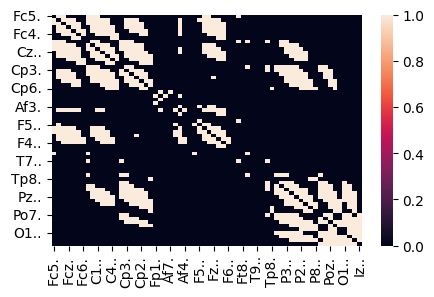

In [13]:
plt.figure(figsize=(5, 3))

sns.heatmap(resultado_df)

# Generar estadísticos para recibir umbrales

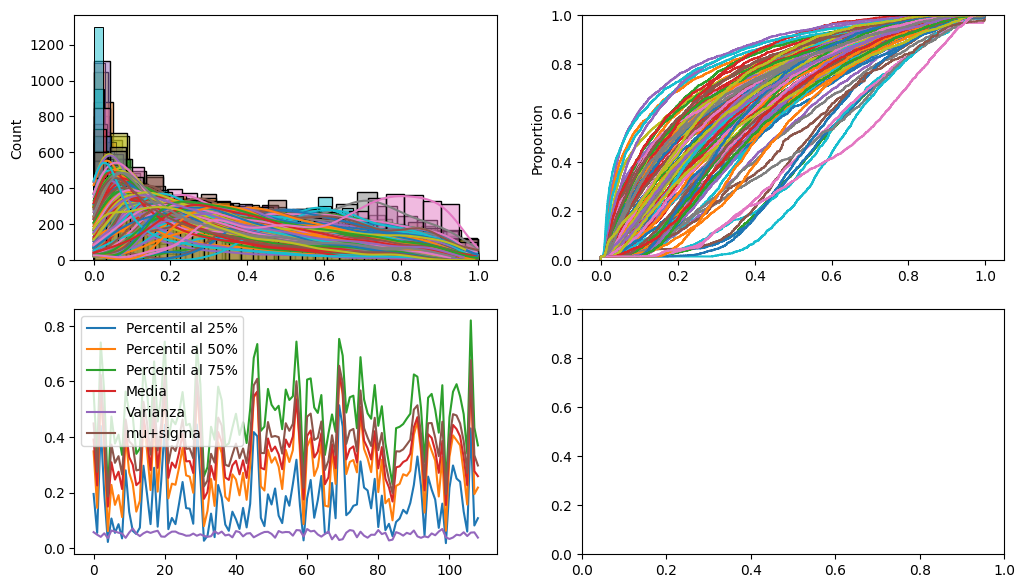

In [16]:
ensayos3_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos3_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))
    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th75, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()

In [17]:
from scipy import stats
stats.median_abs_deviation(th25)

np.float64(0.06955915283857339)

In [18]:
estadisticos_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
                               index=['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th25, th50, th75, promedio, mu_sigma]

min_, max_, mediana_, cosa_ = [], [], [], []
for columna in columnas:
    d1, d2, d3, d4 = np.min(columna), np.max(columna), np.median(columna), stats.median_abs_deviation(columna)
    min_.append(d1)
    max_.append(d2)
    mediana_.append(d3)
    cosa_.append(d4)
estadisticos_df.loc['min'] = min_
estadisticos_df.loc['max'] = max_
estadisticos_df.loc['mediana'] = mediana_
estadisticos_df.loc['cosa_rara'] = cosa_

In [113]:
estadisticos_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
                               index=['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th25, th50, th75, promedio, mu_sigma]

min_, max_, mediana_, cosa_ = [], [], [], []
for idx, columna in enumerate(estadisticos_df.columns):
    d1, d2, d3, d4 = np.min(columnas[idx]), np.max(columnas[idx]), np.median(columnas[idx]), stats.median_abs_deviation(columnas[idx])
    estadisticos_df[columna] = [d1, d2, d3, d4]

In [115]:
estadisticos_df

,th25,th50,th75,promedio,mu_sigma
min,0.018750,0.043536,0.202194,0.153129,0.196388
max,0.542689,0.667679,0.808475,0.649729,0.677091
mediana,0.144532,0.276807,0.493891,0.333420,0.389303
cosa_rara,0.061041,0.074638,0.070225,0.058393,0.058424


# Evaluación estadísticos 

Text(0.5, 1.0, 'umbral=0.2, poblacion>60%')

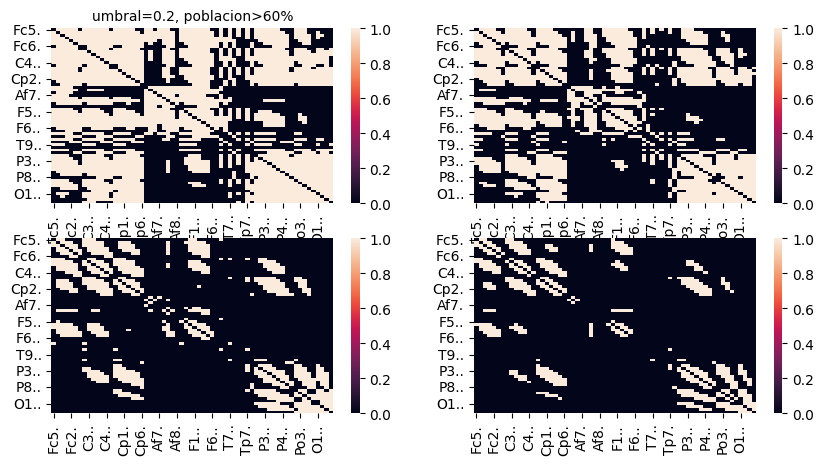

In [53]:
resultado3_df1 = capsula(ensayos3_dfs, 0.2, 0.6)
resultado3_df2 = capsula(ensayos3_dfs, 0.3, 0.6)
resultado3_df3 = capsula(ensayos3_dfs, 0.5, 0.6)
resultado3_df4 = capsula(ensayos3_dfs, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado_df1, ax=axes[0, 0])
sns.heatmap(resultado_df2, ax=axes[0, 1])
sns.heatmap(resultado_df3, ax=axes[1, 0])
sns.heatmap(resultado_df4, ax=axes[1, 1])
# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)

Text(0.5, 1.0, 'umbral=0.3, poblacion>50%')

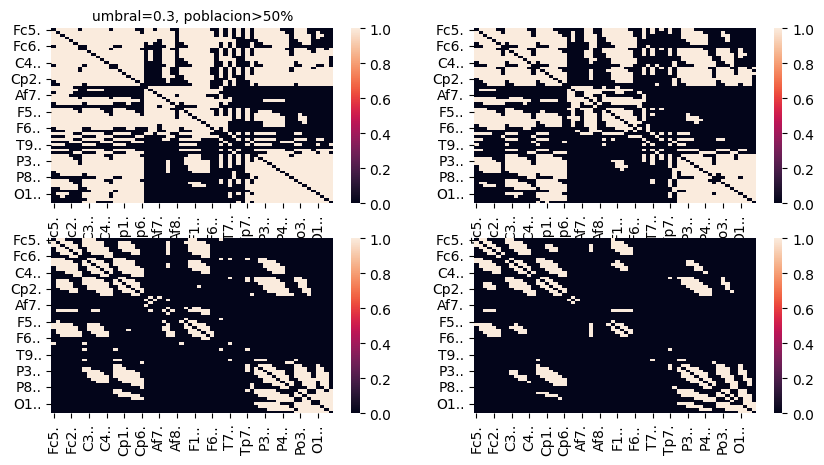

In [54]:
resultado4_df1 = capsula(ensayos4_dfs, 0.3, 0.5)
resultado4_df2 = capsula(ensayos4_dfs, 0.3, 0.6)
resultado4_df3 = capsula(ensayos4_dfs, 0.3, 0.7)
resultado4_df4 = capsula(ensayos4_dfs, 0.3, 0.8)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado_df1, ax=axes[0, 0])
sns.heatmap(resultado_df2, ax=axes[0, 1])
sns.heatmap(resultado_df3, ax=axes[1, 0])
sns.heatmap(resultado_df4, ax=axes[1, 1])
# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.3, poblacion>50%', fontsize=10)

# Generación de resultados
Después del análisis realizado, utilizando los mapas de calor, para poder escoger un threshold adecuado y un porcentaje de la población que cumpla dicho umbral; se procederá a generar los resultados.

Resultados a generar:

Grafo2D
Grafo3D
Métricas de grafo
Gráfico de comunidades con Hub

In [ ]:
# Grafo 2D
ensayo_grafo = nx.from_pandas_adjacency(resultado_df4)
nx.draw_circular(ensayo_grafo, with_labels=True, font_size=7)

In [29]:
def metricas_grafo(G):
    # Métricas:
    #Clusterin promedio
    clust_coeff = nx.average_clustering(G)
    # Longitud de camino promedio (camino más corto)
    try:
        path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        path_length = np.nan # red no conexa
    # Coeficiente de mundo pequeño
    # Comparar con grafo aleatorio de igual N, K
    G_rand = nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges())
    clust_rand = nx.average_clustering(G_rand)
    path_rand = nx.average_shortest_path_length(G_rand)
    small_world_sigma = (clust_coeff / clust_rand) / (path_length / path_rand)
    # Modularidad
    from networkx.algorithms import community
    communities = community.greedy_modularity_communities(G)
    modularity = community.modularity(G, communities)
    # Hubs
    degree_dict = dict(G.degree())
    betwenness = nx.betweenness_centrality(G)
    betwenness = sorted(betwenness.items(), key=lambda x: x[1], reverse=True)
    # Eficiencia global y local
    global_eff = nx.global_efficiency(G)
    local_eff = nx.local_efficiency(G)

    return (clust_coeff, path_length, small_world_sigma, communities, 
            modularity, betwenness, global_eff, local_eff, degree_dict)

In [55]:
# Convertir de dataframe a grafo
ensayo3_grafo_ = nx.from_pandas_adjacency(resultado3_df3)
ensayo4_grafo_ = nx.from_pandas_adjacency(resultado4_df4)

In [41]:
(clust_coeff_3, path_length_3, small_world_sigma_3, communities_3, 
 modularity_3, betwenness_3, global_eff_3, local_eff_3, degree_dict_3) = metricas_grafo(ensayo3_grafo_)
(clust_coeff_4, path_length_4, small_world_sigma_4, communities_4, 
 modularity_4, betwenness_4, global_eff_4, local_eff_4, degree_dict_4) = metricas_grafo(ensayo4_grafo_)

In [33]:
# construcción de dataframe de coordenadas
eeg_coords = pd.read_csv(coordenadas_csv)
eeg_coords.set_index("canal", drop=True, inplace=True)

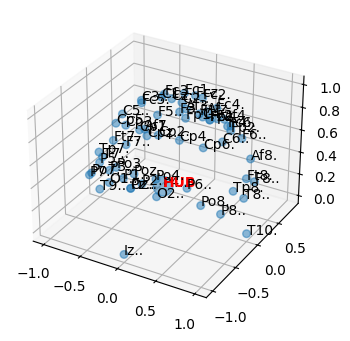

In [35]:
x, y, z = eeg_coords['x'].values, eeg_coords['y'].values, eeg_coords['z'].values
hub = betwenness_[0]

fig = plt.figure(figsize=(4, 4))
axes = [fig.add_subplot(1, 1, 1, projection='3d')]

nodes_size = [30 if idx != hub[0] else 200 for idx in eeg_coords.index]
axes[0].scatter(x, y, z, alpha=0.5, s=nodes_size)
for idx, (x_, y_, z_) in enumerate(zip(x, y, z)):
    axes[0].text(x_, y_, z_, eeg_coords.index[idx], fontsize=10)
    if eeg_coords.index[idx] == hub[0]:
        axes[0].text(x_, y_, z_, 'HUB', color='red', fontweight='bold', fontsize=10)

In [57]:
# Grafo 2D
def grafo2D(df, pos):
    ensayo_grafo = nx.from_pandas_adjacency(df)
    nx.draw_circular(ensayo_grafo, with_labels=True, font_size=7, ax=pos)

    return ensayo_grafo

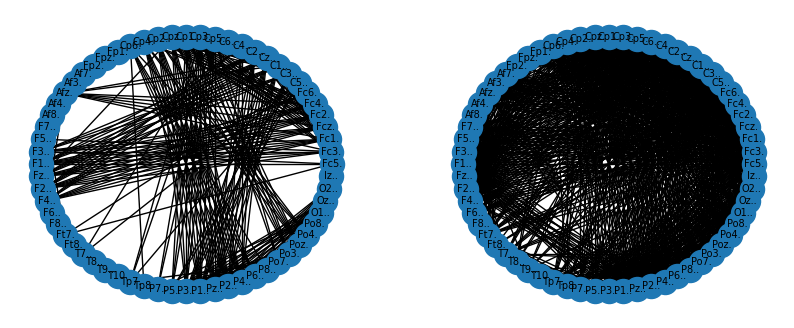

In [59]:
# Grafo2 para ensayos 3 y 4
hub3 = betwenness_3[0]
hub4 = betwenness_4[0]

fig = plt.figure(figsize=(10, 4))
axes = [fig.add_subplot(1, 2, 1), 
        fig.add_subplot(1, 2, 2)]

ensayo_grafo = grafo2D(resultado3_df3, axes[0])
ensayo_grafo = grafo2D(resultado4_df1, axes[1])

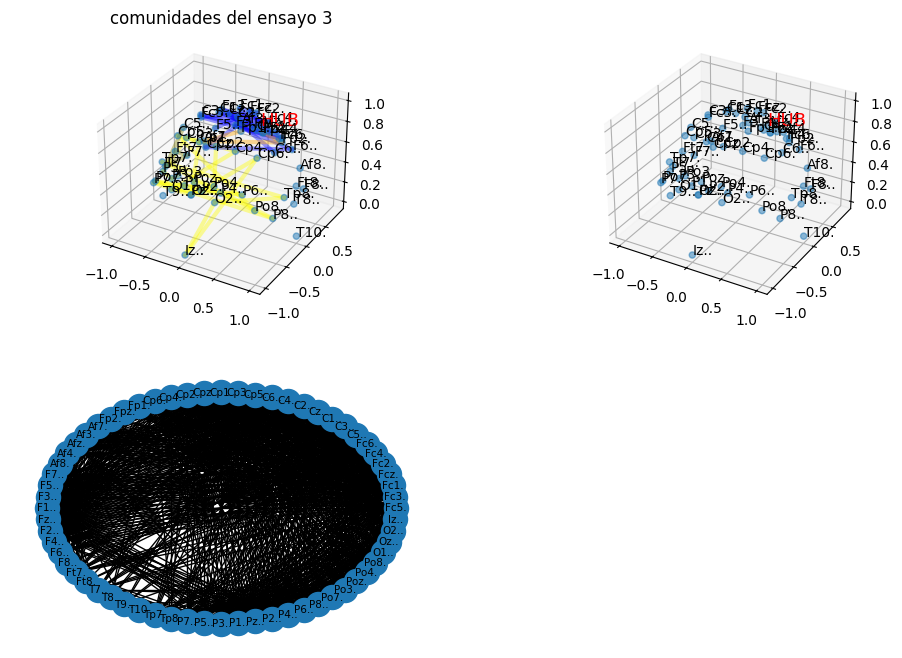

In [60]:
hub = betwenness_3[0]

fig = plt.figure(figsize=(12, 8))
axes = [fig.add_subplot(2, 2, 1, projection = "3d"),
       fig.add_subplot(2, 2, 2, projection = "3d"),
       fig.add_subplot(2,2,3)]

grafo_comunidades(communities_3, hub, eeg_coords, axes[0])
grafo_3d(hub, eeg_coords, axes[1])
ensayo_grafo = grafo_2d(resultado3_df3, axes[2])

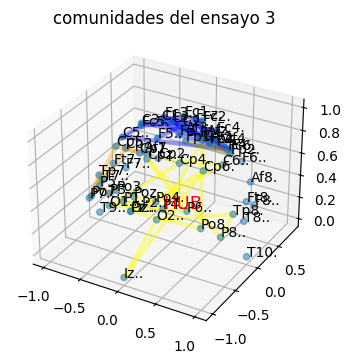

In [39]:
# encapsulación gráficos de comunidades

def grafo_comunidades(comunidades, Hub, coords, pos):
    x, y, z = coords["x"].values, coords["y"].values, coords["z"].values

    nodes_size = [30 if idx != Hub[0] else 200 for idx in coords.index] # cambiar el tamaño del nodo si es el hub
    pos.scatter(x, y, z, alpha = 0.5)
 
    for idx, (x_, y_, z_) in enumerate(zip(x, y, z)):
        pos.text(x_, y_, z_, coords.index[idx], fontsize = 10)
        if coords.index[idx] == Hub[0]:
            pos.text(x_, y_, z_, "HUB", color = "red", fontsize = 13) # cambiar el color del texto del nodo si es el hub

    colores = ["yellow", "blue", "orange", "olive", "red"]
    for n_comunidad, comunidad in enumerate(comunidades):  # recorrer las comunidades, plotearemos así las aristas
        for idx in range(len(comunidad)-1):
            n1, n2 = list(comunidad)[idx], list(comunidad)[idx+1]
            # plotear arista
            x_ = [coords.loc[n1, "x"], coords.loc[n2, "x"]]
            y_ = [coords.loc[n1, "y"], coords.loc[n2, "y"]]
            z_ = [coords.loc[n1, "z"], coords.loc[n2, "z"]]
            pos.plot(x_, y_, z_, linewidth = 3, alpha = 0.4, color = colores[n_comunidad])
    pos.set_title("comunidades del ensayo 3")


hub = betwenness_[0]

fig = plt.figure(figsize=(4,4))
axes = [fig.add_subplot(1, 1, 1, projection = "3d")]
grafo_comunidades(communities_, hub, eeg_coords, axes[0])

podemos generar un grafo de comunidades, lo podemos encapsular en una línea y aplicarlo a más ensayos.
Poder hacer comparaciones entre ensayos
generar el for sobre las comunidades en vez de los nodos para hacer las comparaciones entre comunidades
Grafo de comunidades

In [47]:
comunidad_prueba = communities_[2]   # objeto frozenset, no iterable. CAMBIAR
n1, n2 = list(comunidad_prueba)[0], list(comunidad_prueba)[1] #  si tenemos más nodos debemos ir recorriendolo por pares
n1, n2

('Po3.', 'P3..')

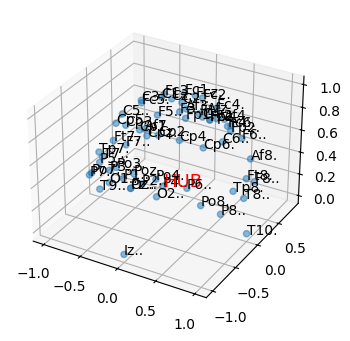

In [43]:
def grafo_3d(Hub, coords, pos):
    x, y, z =coords["x"].values, coords["y"].values, coords["z"].values
    
    nodes_size = [30 if idx != Hub[0] else 200 for idx in coords.index] # cambiar el tamaño del nodo si es el hub
    pos.scatter(x, y, z, alpha = 0.5)
     
    for idx, (x_, y_, z_) in enumerate(zip(x, y, z)):
        pos.text(x_, y_, z_, coords.index[idx], fontsize = 10)
        if coords.index[idx] == hub[0]:
            pos.text(x_, y_, z_, "HUB", color = "red", fontsize = 13) # cambiar el color del texto del nodo si es el 

hub = betwenness_[0]

fig = plt.figure(figsize=(4,4))
axes = [fig.add_subplot(1, 1, 1, projection = "3d")]
grafo_3d(hub, eeg_coords, axes[0])

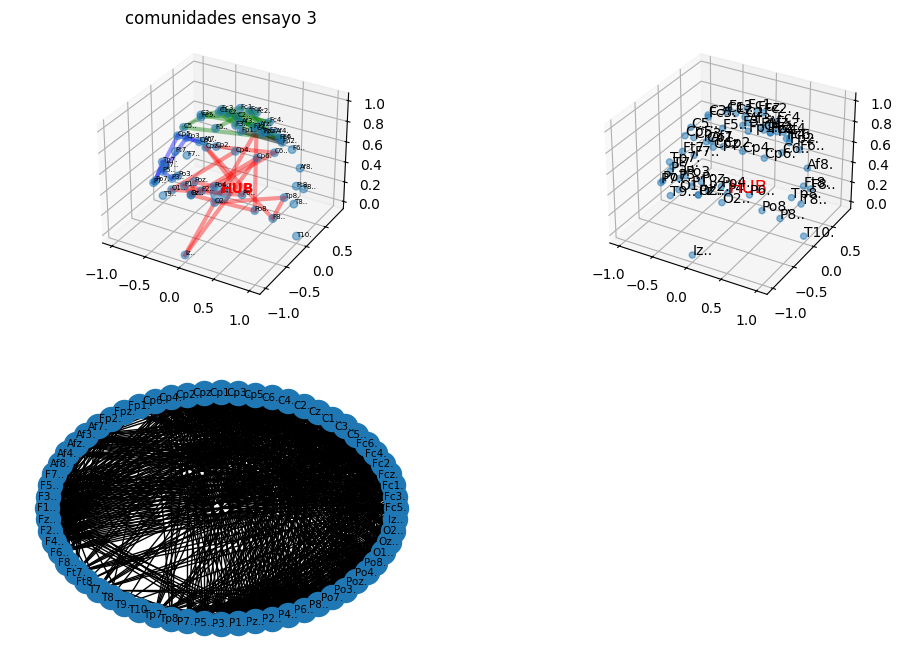

In [124]:
hub = betwenness_4[0]

fig = plt.figure(figsize=(12, 8))
axes = [fig.add_subplot(2, 2, 1, projection = "3d"),
       fig.add_subplot(2, 2, 2, projection = "3d"),
       fig.add_subplot(2,2,3)]

grafo_comunidades(communities_4, hub, eeg_coords, axes[0])
grafo_3d(hub, eeg_coords, axes[1])
ensayo_grafo = grafo_2d(resultado4_df4, axes[2])

# Examen 

## Ensayo 5

In [62]:
#Datasets
ensayo5_excel = r"C:\Users\ecere\Documents\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_05.xlsx"
ensayo5_dict = pd.read_excel(ensayo5_excel, sheet_name=None, index_col=0)

In [116]:
ensayos5_dfs = lista_dfs(ensayo5_dict)

In [117]:
#Compactar matríz 
resultado_df = capsula(ensayos5_dfs, 0.4, 0.5)

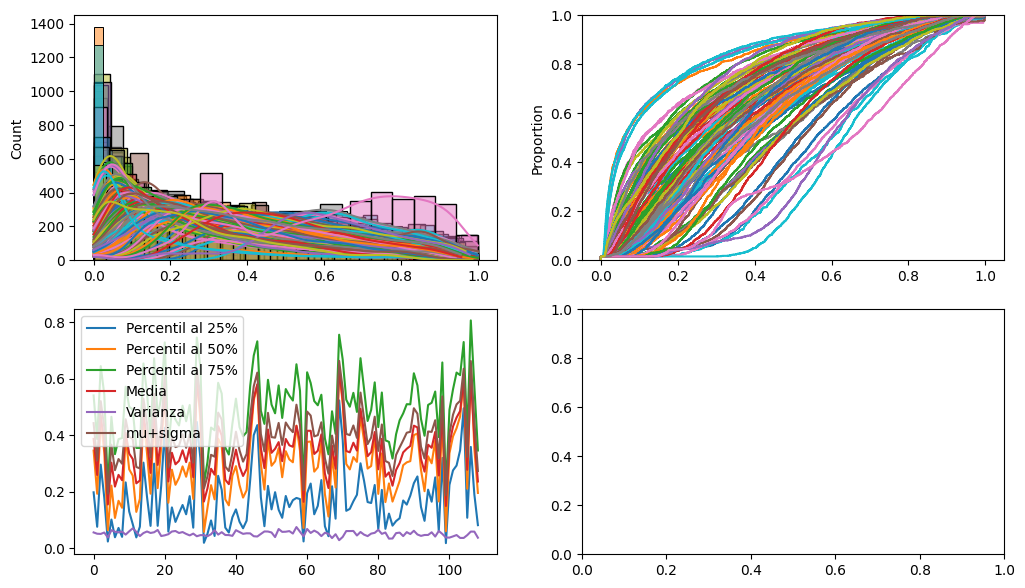

In [118]:
#Estadísticos 
ensayos5_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos5_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))
    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th75, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()

Text(0.5, 1.0, 'umbral=0.2, poblacion>60%')

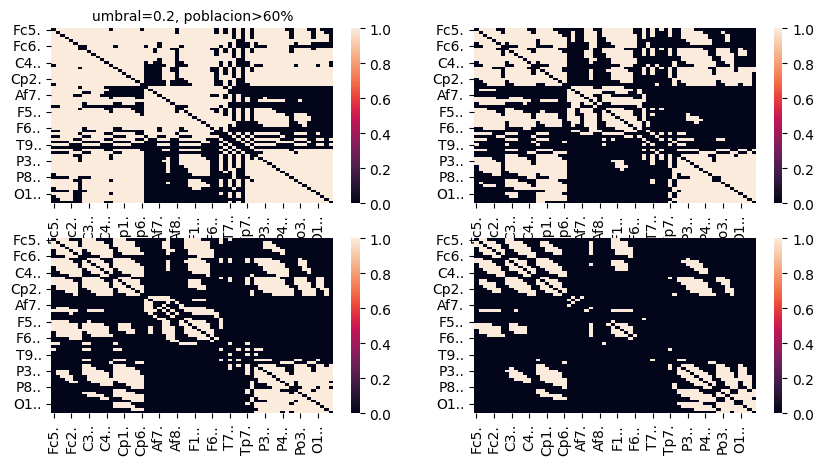

In [119]:
#Evaluación
resultado5_df1 = capsula(ensayos5_dfs, 0.2, 0.5)
resultado5_df2 = capsula(ensayos5_dfs, 0.3, 0.6)
resultado5_df3 = capsula(ensayos5_dfs, 0.4, 0.6)
resultado5_df4 = capsula(ensayos5_dfs, 0.5, 0.7)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado5_df1, ax=axes[0, 0])
sns.heatmap(resultado5_df2, ax=axes[0, 1])
sns.heatmap(resultado5_df3, ax=axes[1, 0])
sns.heatmap(resultado5_df4, ax=axes[1, 1])
# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)

In [120]:
estadisticos_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
                               index=['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th25, th50, th75, promedio, mu_sigma]

min_, max_, mediana_, cosa_ = [], [], [], []
for idx, columna in enumerate(estadisticos_df.columns):
    d1, d2, d3, d4 = np.min(columnas[idx]), np.max(columnas[idx]), np.median(columnas[idx]), stats.median_abs_deviation(columnas[idx])
    estadisticos_df[columna] = [d1, d2, d3, d4]

In [121]:
estadisticos_df

,th25,th50,th75,promedio,mu_sigma
min,0.017846,0.057751,0.205711,0.149197,0.187056
max,0.522739,0.651729,0.805549,0.634132,0.662407
mediana,0.152787,0.293580,0.500263,0.345151,0.399663
cosa_rara,0.070700,0.086319,0.075435,0.066217,0.066465


# Generar resultados 

In [84]:
# Convertir de dataframe a grafo
ensayo5_grafo_ = nx.from_pandas_adjacency(resultado5_df2)

In [81]:
(clust_coeff_5, path_length_5, small_world_sigma_5, communities_5, 
 modularity_5, betwenness_5, global_eff_5, local_eff_5, degree_dict_5) = metricas_grafo(ensayo5_grafo_)

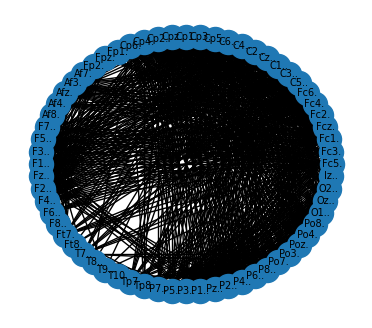

In [100]:
# Grafo2D
hub5 = betwenness_5[0]


fig = plt.figure(figsize=(10, 4))
axes = [fig.add_subplot(1, 2, 1)]

ensayo_grafo = grafo2D(resultado5_df2, axes[0])

Text(0.5, 0.92, 'Comunidades ensayo 5')

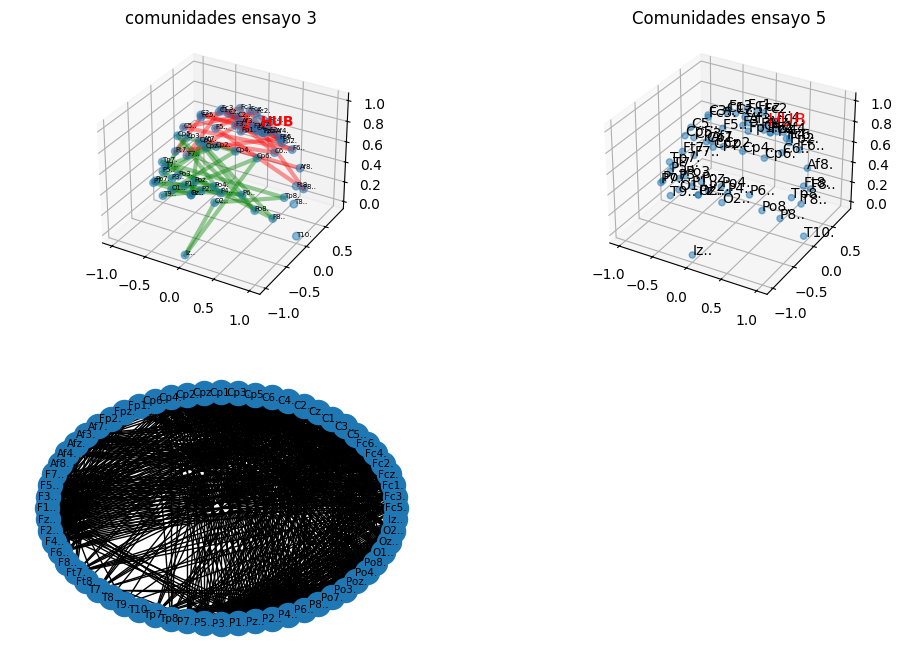

In [122]:
hub = betwenness_5[0]

fig = plt.figure(figsize=(12, 8))
axes = [fig.add_subplot(2, 2, 1, projection = "3d"),
       fig.add_subplot(2, 2, 2, projection = "3d"),
       fig.add_subplot(2,2,3)]

grafo_comunidades(communities_5, hub, eeg_coords, axes[0])
grafo_3d(hub, eeg_coords, axes[1])
ensayo_grafo = grafo_2d(resultado5_df2, axes[2])
axes[1].set_title("Comunidades ensayo 5")

## Ensayo 6

In [88]:
ensayo6_excel = r"C:\Users\ecere\Documents\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_06.xlsx"
ensayo6_dict = pd.read_excel(ensayo6_excel, sheet_name=None, index_col=0)

In [91]:
ensayos6_dfs = lista_dfs(ensayo6_dict)

In [92]:
resultado_df = capsula(ensayos6_dfs, 0.4, 0.5)

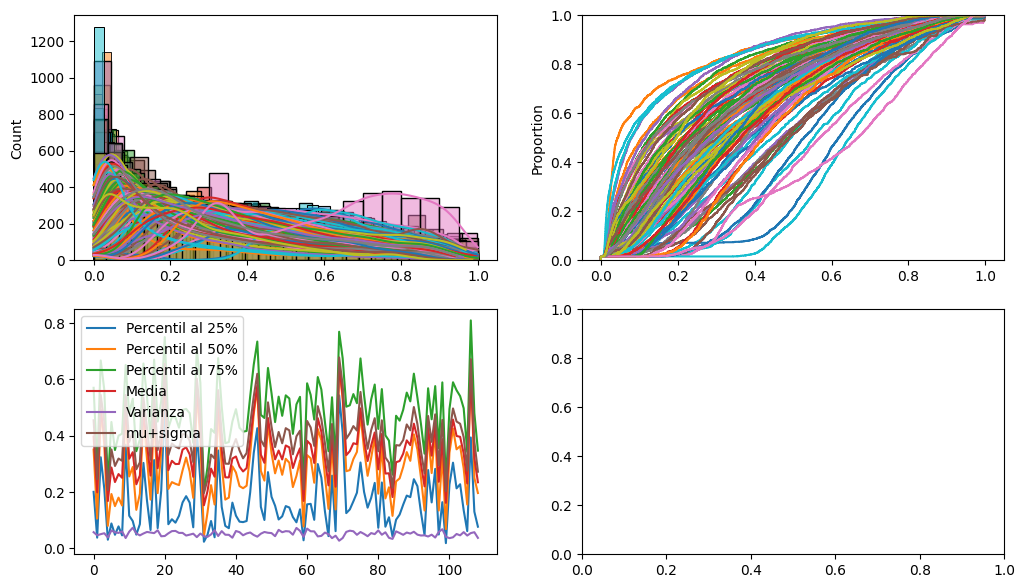

In [93]:
#Estadísticos 
ensayos6_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos6_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))
    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th75, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()

Text(0.5, 1.0, 'umbral=0.2, poblacion>60%')

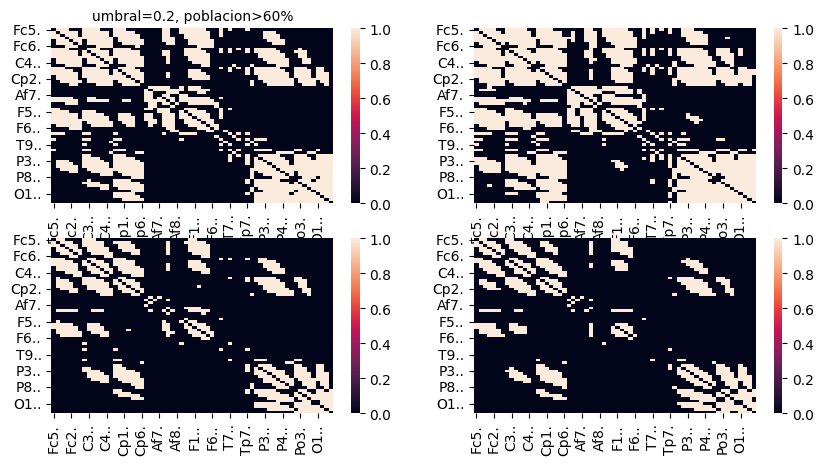

In [96]:
#Evaluación
resultado6_df1 = capsula(ensayos6_dfs, 0.4, 0.5)
resultado6_df2 = capsula(ensayos6_dfs, 0.3, 0.6)
resultado6_df3 = capsula(ensayos6_dfs, 0.5, 0.6)
resultado6_df4 = capsula(ensayos6_dfs, 0.5, 0.7)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado6_df1, ax=axes[0, 0])
sns.heatmap(resultado6_df2, ax=axes[0, 1])
sns.heatmap(resultado6_df3, ax=axes[1, 0])
sns.heatmap(resultado6_df4, ax=axes[1, 1])
# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)

In [106]:
estadisticos_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
                               index=['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th25, th50, th75, promedio, mu_sigma]

min_, max_, mediana_, cosa_ = [], [], [], []
for idx, columna in enumerate(estadisticos_df.columns):
    d1, d2, d3, d4 = np.min(columnas[idx]), np.max(columnas[idx]), np.median(columnas[idx]), stats.median_abs_deviation(columnas[idx])
    estadisticos_df[columna] = [d1, d2, d3, d4]

In [107]:
estadisticos_df

,th25,th50,th75,promedio,mu_sigma
min,0.018750,0.043536,0.202194,0.153129,0.196388
max,0.542689,0.667679,0.808475,0.649729,0.677091
mediana,0.144532,0.276807,0.493891,0.333420,0.389303
cosa_rara,0.061041,0.074638,0.070225,0.058393,0.058424


In [98]:
# Convertir de dataframe a grafo
ensayo6_grafo_ = nx.from_pandas_adjacency(resultado6_df2)

In [99]:
(clust_coeff_6, path_length_6, small_world_sigma_6, communities_6, 
 modularity_, betwenness_6, global_eff_6, local_eff_6, degree_dict_6) = metricas_grafo(ensayo6_grafo_)

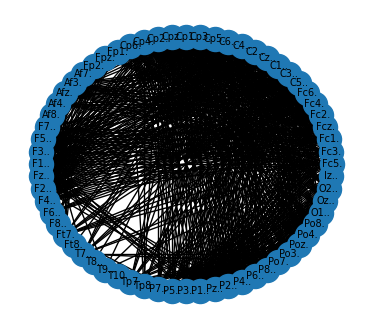

In [101]:
# Grafo2 
hub6 = betwenness_6[0]


fig = plt.figure(figsize=(10, 4))
axes = [fig.add_subplot(1, 2, 1)]

ensayo_grafo = grafo2D(resultado6_df2, axes[0])

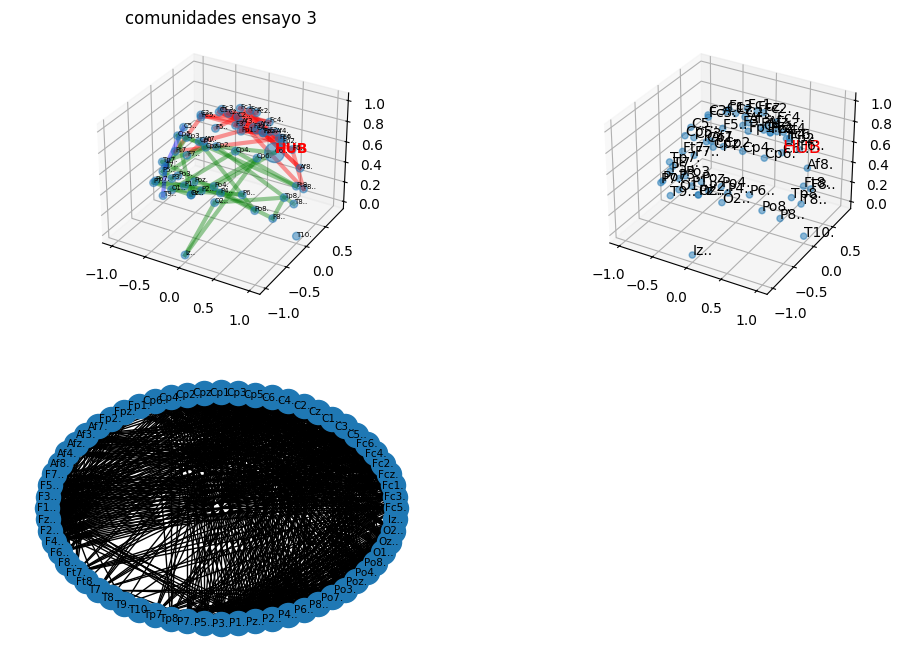

In [102]:
hub = betwenness_6[0]

fig = plt.figure(figsize=(12, 8))
axes = [fig.add_subplot(2, 2, 1, projection = "3d"),
       fig.add_subplot(2, 2, 2, projection = "3d"),
       fig.add_subplot(2,2,3)]

grafo_comunidades(communities_6, hub, eeg_coords, axes[0])
grafo_3d(hub, eeg_coords, axes[1])
ensayo_grafo = grafo_2d(resultado6_df2, axes[2])

# Cónclusión

En el ensayo 5 fue acerca de que al sujeto se le pidió que abriera y cierra ambos puños  o ambos pies dependiendo de donde aparece el objetivo, arriba o abajo. En el ensayo 6 se le pidió casi lo mismo pero que se lo imaginara. 